<a href="https://colab.research.google.com/github/WasifRaza123/python-project/blob/master/Image_Classification_using_CIFAR_100_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import tensorflow.keras as keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, UpSampling2D, Flatten, BatchNormalization, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras import optimizers
from keras.datasets import cifar100
import tensorflow as tf
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
import time
from skimage.transform import resize
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.preprocessing.image import ImageDataGenerator

In [3]:
from __future__ import print_function
import keras


from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os



import seaborn as sns
import matplotlib


from sklearn.metrics import confusion_matrix, classification_report
import itertools

%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np


def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

In [6]:
num_classes = 100
nb_epochs = 10

(x_train, y_train), (x_test, y_test) = cifar100.load_data()

#Pre-process the data
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

datagen = ImageDataGenerator(preprocessing_function=get_random_eraser(v_l=0, v_h=1, pixel_level=True))
datagen.fit(x_train)

169009152/169001437 [==============================] - 2s 0us/step


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


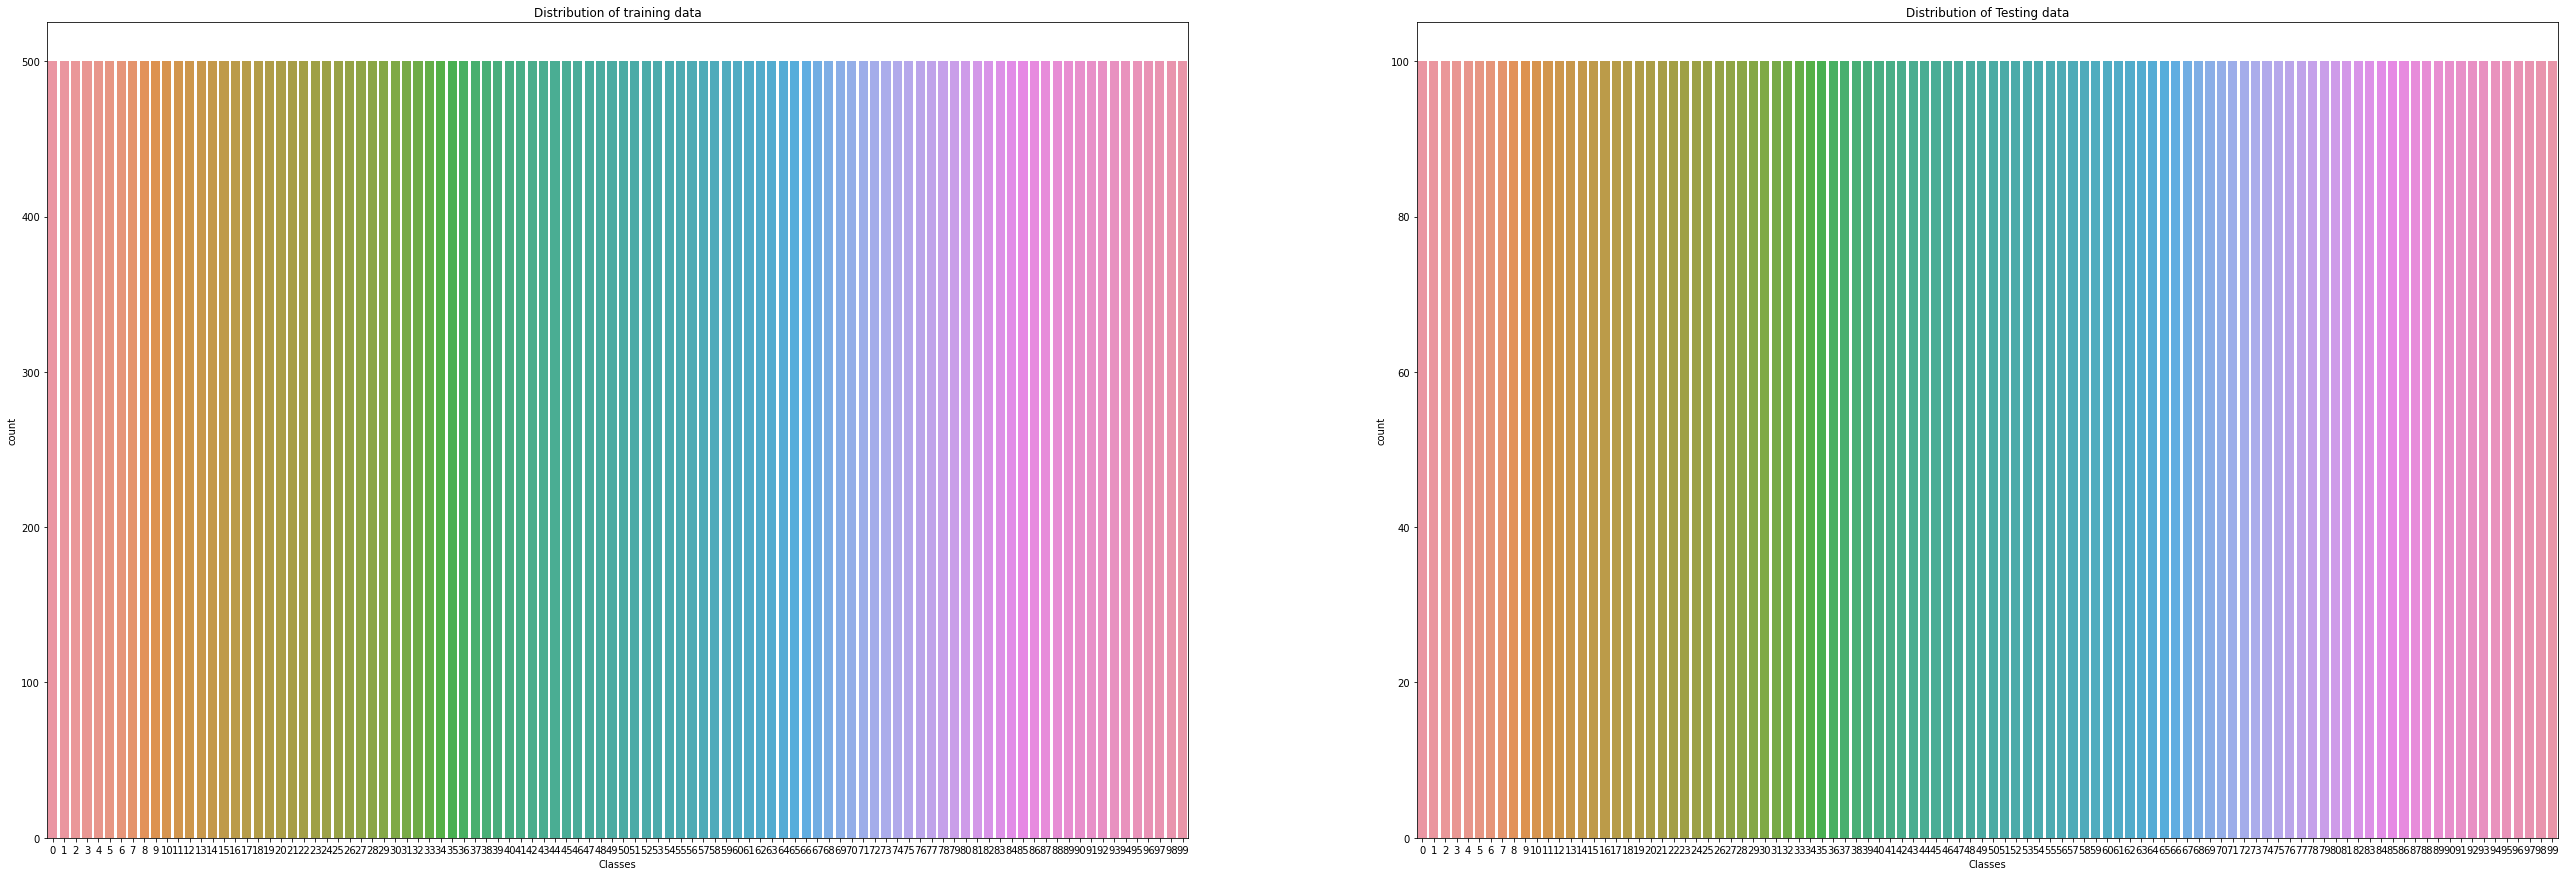

In [7]:
fig, axs = plt.subplots(1,2,figsize=(45,15)) 
# Count plot for training set
sns.countplot(y_train.ravel(), ax=axs[0])
axs[0].set_title('Distribution of training data')
axs[0].set_xlabel('Classes')
# Count plot for testing set
sns.countplot(y_test.ravel(), ax=axs[1])
axs[1].set_title('Distribution of Testing data')
axs[1].set_xlabel('Classes')
plt.show()

In [8]:
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [9]:

resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

for layer in resnet_model.layers:
    if isinstance(layer, BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False

model = Sequential()
model.add(UpSampling2D())
model.add(UpSampling2D())

model.add(resnet_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(224, activation='relu'))
model.add(Dropout(.25))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))


94773248/94765736 [==============================] - 0s 0us/step


In [10]:
print(np.shape(x_train))
print(np.shape(x_test))
print(np.shape(y_train))
print(np.shape(y_test))

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 100)
(10000, 100)


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

t=time.time()
historytemp = model.fit(datagen.flow(x_train, y_train,
                                  batch_size=64),
                                  steps_per_epoch=x_train.shape[0] // 64,
                                  epochs=15,
                                  validation_data=(x_test, y_test))
print('Training time: %s' % (t - time.time()))


Epoch 1/15
781/781 [==============================] - 141s 175ms/step - loss: 2.6263 - accuracy: 0.3794 - val_loss: 1.0113 - val_accuracy: 0.7072
Epoch 2/15
781/781 [==============================] - 138s 177ms/step - loss: 1.2113 - accuracy: 0.6559 - val_loss: 0.8667 - val_accuracy: 0.7412
Epoch 3/15
781/781 [==============================] - 139s 178ms/step - loss: 1.0227 - accuracy: 0.7014 - val_loss: 0.8166 - val_accuracy: 0.7559
Epoch 4/15
781/781 [==============================] - 139s 178ms/step - loss: 0.9259 - accuracy: 0.7269 - val_loss: 0.7821 - val_accuracy: 0.7614
Epoch 5/15
781/781 [==============================] - 138s 177ms/step - loss: 0.8384 - accuracy: 0.7470 - val_loss: 0.7830 - val_accuracy: 0.7642
Epoch 6/15
781/781 [==============================] - 139s 179ms/step - loss: 0.7820 - accuracy: 0.7614 - val_loss: 0.7745 - val_accuracy: 0.7693
Epoch 7/15
781/781 [==============================] - 138s 177ms/step - loss: 0.7217 - accuracy: 0.7828 - val_loss: 0.7754 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


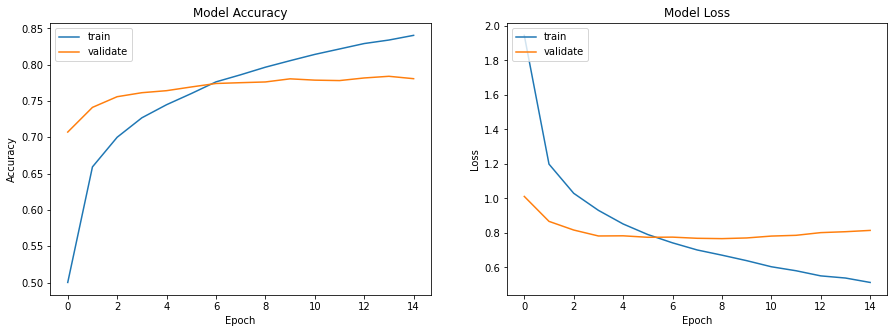

In [ ]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(historytemp.history.keys())

plotmodelhistory(historytemp)

In [ ]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model.predict(x_test)

313/313 [==============================] - 12s 38ms/step - loss: 0.8144 - accuracy: 0.7807
Test loss: 0.8143514394760132
Test accuracy: 0.7807000279426575


In [ ]:
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar100_trained_model.h5'

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

In [11]:
import os
os.chdir("/content/drive/MyDrive")
print(os.getcwd())

/content/drive/MyDrive


In [12]:
import os
from keras.models import load_model
new_model=load_model('saved_models/keras_cifar100_trained_model.h5')

In [13]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
up_sampling2d (UpSampling2D) (None, None, None, None)  0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, None, None, None)  0         
_________________________________________________________________
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 224)               458976    
_________________________________________________________________
dropout (Dropout)            (None, 224)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 224)               8

In [14]:
# Score saved model.
scores = new_model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = new_model.predict(x_test)

313/313 [==============================] - 46s 41ms/step - loss: 0.8144 - accuracy: 0.7807
Test loss: 0.8143512606620789
Test accuracy: 0.7807000279426575


In [15]:
def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.
    """
    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    
    ax.set_xlabel('Predicted Label') 
    ax.set_ylabel('True Label')
    
    return im, cbar

def annotate_heatmap(im, data=None, fmt="d", threshold=None):
    """
    A function to annotate a heatmap.
    """
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, format(data[i, j], fmt), horizontalalignment="center",
                                 color="white" if data[i, j] > thresh else "black")
            texts.append(text)

    return texts

In [24]:

labels=['apple','aquarium_fish','baby','bear','beaver','bed','bee','beetle','bicycle','bottle','bowl','boy','bridge','bus','butterfly','camel','can','castle','caterpillar','cattle',
'chair','chimpanzee','clock','cloud','cockroach','couch','crab','crocodile','cup','dinosaur','dolphin','elephant','flatfish','forest','fox','girl','hamster','house','kangaroo','computer_keyboard','lamp','lawn_mower',
'leopard','lion','lizard','lobster','man','maple_tree','motorcycle','mountain','mouse','mushroom','oak_tree','orange','orchid','otter','palm_tree','pear','pickup_truck','pine_tree','plain','plate',
'poppy','porcupine','possum','rabbit','raccoon','ray','road','rocket','rose','sea','seal','shark','shrew','skunk','skyscraper','snail','snake','spider','squirrel','streetcar',
'sunflower','sweet_pepper','table','tank','telephone','television','tiger','tractor','train','trout','tulip','turtle','wardrobe','whale',
'willow_tree','wolf','woman','worm']
        

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(pred, axis=1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis=1)
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = x_test[errors]







In [25]:

#classification report
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       100
           1       0.91      0.89      0.90       100
           2       0.61      0.77      0.68       100
           3       0.77      0.68      0.72       100
           4       0.58      0.70      0.64       100
           5       0.80      0.77      0.79       100
           6       0.91      0.88      0.89       100
           7       0.83      0.80      0.82       100
           8       0.99      0.90      0.94       100
           9       0.90      0.91      0.91       100
          10       0.76      0.52      0.62       100
          11       0.70      0.44      0.54       100
          12       0.85      0.87      0.86       100
          13       0.83      0.72      0.77       100
          14       0.85      0.77      0.81       100
          15       0.85      0.82      0.83       100
          16       0.74      0.88      0.80       100
          17       0.93    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

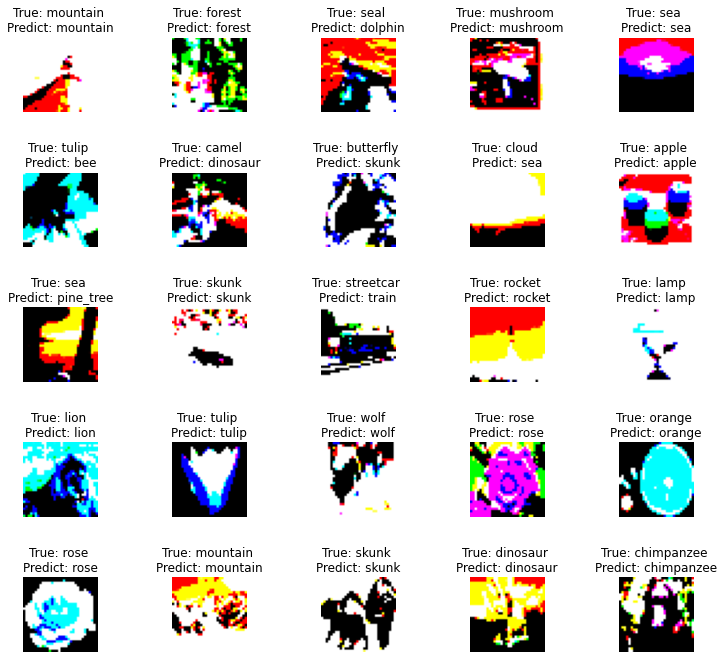

In [18]:
R = 5
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, R*C):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (labels[Y_true[i]], labels[Y_pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [19]:
def show_test(number):
    fig = plt.figure(figsize = (3,3))
    test_image = np.expand_dims(x_test[number], axis=0)
    test_result = new_model.predict_classes(test_image)
    plt.imshow(x_test[number])
    dict_key = test_result[0]
    plt.title("Predicted: {} \nTrue Label: {}".format(labels[dict_key],
                                                      labels[Y_true[number]]))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


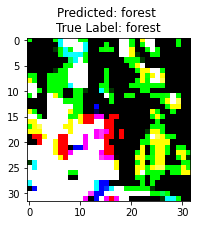

In [20]:
show_test(1)

In [ ]:
os.chdir("/content")
print(os.getcwd())

/content


In [ ]:
from PIL import Image

#Load the image
img = Image.open('boy.jfif')

#Get basic details about the image
print(img.format)
print(img.mode)
print(img.size)

#show the image
img.show()
plt.imshow(img)


In [ ]:
fig = plt.figure(figsize = (3,3))
image = img.resize((32, 32))

test_image = np.expand_dims(image, axis=0)
test_result = new_model.predict_classes(test_image)
plt.imshow(image)
dict_key = test_result[0]
plt.title("Predicted: {}".format(labels[dict_key]))
#plt.title("Predicted: {} \nTrue Label: {}".format(labels[dict_key],
      #                                                labels[Y_true]))

In [ ]:
#testing model on images downloaded from the internet
import os
from skimage import io
from PIL import Image
x_te = []
images=[]
label=[]
l=['rose','sunflower','tulip','Orange','Apple Red 1','Apple Red 2','Apple Red 3','Apple Crimson Snow']
for item in l:
  path='/content/drive/MyDrive/test/{}/'.format(item)
  for image_path in os.listdir(path):
    img_path=path+image_path
    img = Image.open('{}'.format(img_path))
    image = img.resize((32, 32))
    input_arr = keras.preprocessing.image.img_to_array(image)
    x_te.append(input_arr)
    if item=='rose':
      label.append(70)
    elif item=='sunflower':
      label.append(82)
    elif item=='tulip':
      label.append(92)
    elif item=='Orange':
      label.append(53) 
    else:
      label.append(0)
    images.append(img)


In [ ]:
x_te=np.array(x_te)
y_te=np.array(label)

In [ ]:
x_te = preprocess_input(x_te)
y_te = np_utils.to_categorical(y_te, num_classes)

In [ ]:
print(np.shape(x_te))
print(np.shape(y_te))

(3164, 32, 32, 3)
(3164, 100)


In [ ]:
# Score saved model.
scores = new_model.evaluate(x_te, y_te, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


99/99 [==============================] - 3s 29ms/step - loss: 1.5548 - accuracy: 0.6934
Test loss: 1.5547860860824585
Test accuracy: 0.6934260725975037


In [ ]:
np.save('x_te.npy', x_te) # save
np.save('y_te.npy', y_te)

In [26]:
print(os.getcwd())
os.chdir('/content/drive/My Drive/test/')
print(os.getcwd())

/content/drive/MyDrive
/content/drive/My Drive/test


In [27]:
new_xte = np.load('x_te.npy') ## load from drive
new_yte = np.load('y_te.npy')

In [28]:
# Score of saved model on external dataset
scores = new_model.evaluate(new_xte, new_yte, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
predi = new_model.predict(new_xte)

99/99 [==============================] - 4s 45ms/step - loss: 1.5548 - accuracy: 0.6934
Test loss: 1.5547860860824585
Test accuracy: 0.6934260725975037


In [ ]:
#testing accuracy of model from items of the original test set
(x_tr, y_tr), (x_t, y_t) = cifar100.load_data()
#Pre-process the data
x_t = preprocess_input(x_t)




In [ ]:

label=[]
images=[]
for item in range(len(y_t)):
  if y_t[item]==0:#apple
    images.append(x_t[item])
    label.append(0)
  elif y_t[item]==53:#orange
    images.append(x_t[item])
    label.append(53)
  elif y_t[item]==70:#rose
    images.append(x_t[item])
    label.append(70)
  elif y_t[item]==82:#sunflower
    images.append(x_t[item])
    label.append(82)
  elif y_t[item]==72:#tulip
    images.append(x_t[item])
    label.append(72)
print(np.shape(images))
images=np.array(images)
label = np_utils.to_categorical(label, num_classes)
print(np.shape(label))

(500, 32, 32, 3)
(500, 100)


In [ ]:
print(os.getcwd())
os.chdir('/content/drive/My Drive/test/')
print(os.getcwd())

/content/drive/My Drive/test
/content/drive/My Drive/test


In [ ]:
np.save('orignal_x_t.npy', images) # save
np.save('original_y_t.npy', label)

In [ ]:
orignal_x_t = np.load('orignal_x_t.npy')
orignal_y_t = np.load('original_y_t.npy')

In [ ]:
#testing accuracy of model from items of the original test set
scores = new_model.evaluate(orignal_x_t, orignal_y_t, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
prd = new_model.predict(orignal_x_t)

16/16 [==============================] - 1s 54ms/step - loss: 0.5588 - accuracy: 0.8440
Test loss: 0.5588271021842957
Test accuracy: 0.843999981880188


In [36]:
os.chdir("/content")
print(os.getcwd())

/content


In [42]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


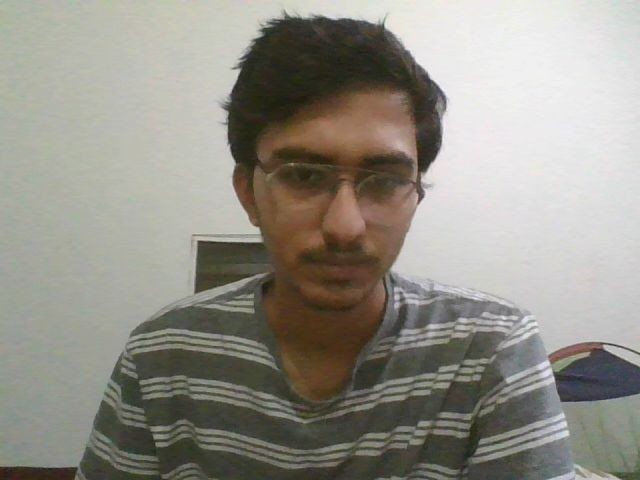

In [43]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

JPEG
RGB
(640, 480)


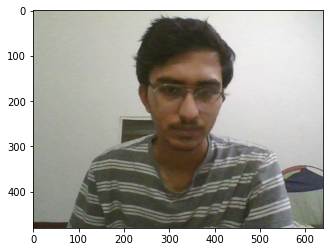

In [44]:
from PIL import Image

#Load the image
img = Image.open('photo.jpg')

#Get basic details about the image
print(img.format)
print(img.mode)
print(img.size)

#show the image
img.show()
plt.imshow(img)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Text(0.5, 1.0, 'Predicted: man')

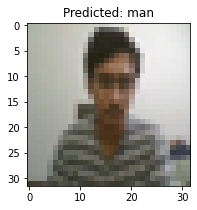

In [45]:
fig = plt.figure(figsize = (3,3))
image = img.resize((32, 32))

test_image = np.expand_dims(image, axis=0)
test_result = new_model.predict_classes(test_image)
plt.imshow(image)
dict_key = test_result[0]
plt.title("Predicted: {}".format(labels[dict_key]))
